## Project Introduction

<p>Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so Tasty Bytes decided to provide it. The company started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home.</p>

<p>At the moment, the Product team choose their favorite recipe from a selection and display that on the home page. They have noticed that traffic to the rest of the website goes up by as much as 40% if a popular recipe is picked. More traffic means more subscriptions so this is really important to the company. But they don’t know how to decide if a recipe will be popular. They seek the Data Science team's help to choose which recipes should be displayed on the home page. They whould like to know if it is possible to:</p>
    1. predict which recipes will lead to high traffic; <br>
    2. correctly predict high traffic recipes 80% of the time. <br>
    
<p>A dataset has been provided to make the investigation.</p>

<p> Since the objective of this project is to "<I>predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes</I>", we will build up classification models to perform the prediction, and will use <b>precision</b> as the metric to evaluate if the classifiers can correctly predict high traffic recipes 80% of the time. Different classification modeling mechanisms will be used to build up the classifiers to see if the objective can be reached, and ensemble models will be built up as well. </p>   

## Import Data from the CSV File

In [8]:
import pandas as pd

df = pd.read_csv('data/recipe_site_traffic_2212.csv')

## Perform Basic Exploratory Data Aanalysis

In [9]:
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [11]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [12]:
df.describe(include=[object])

,category,servings,high_traffic
count,947,947,574
unique,11,6,1
top,Breakfast,4,High
freq,106,389,574


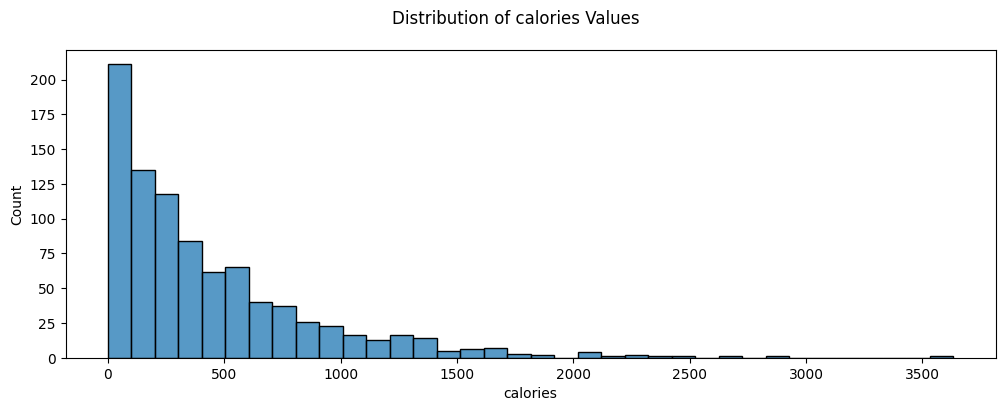

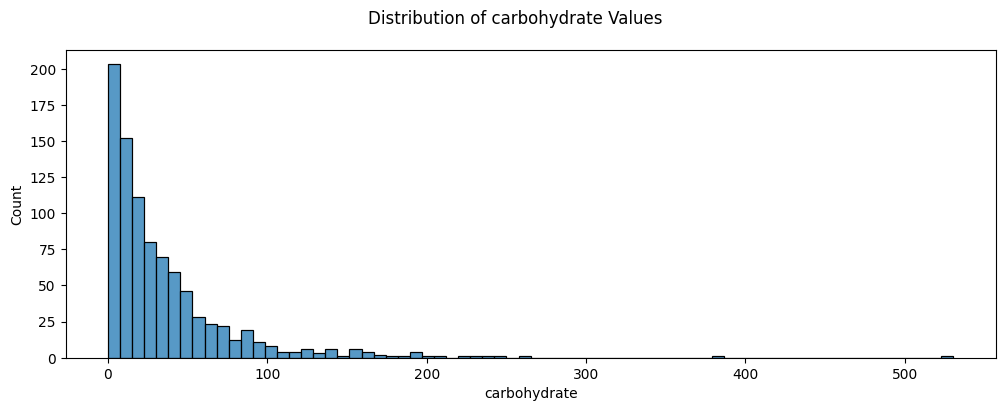

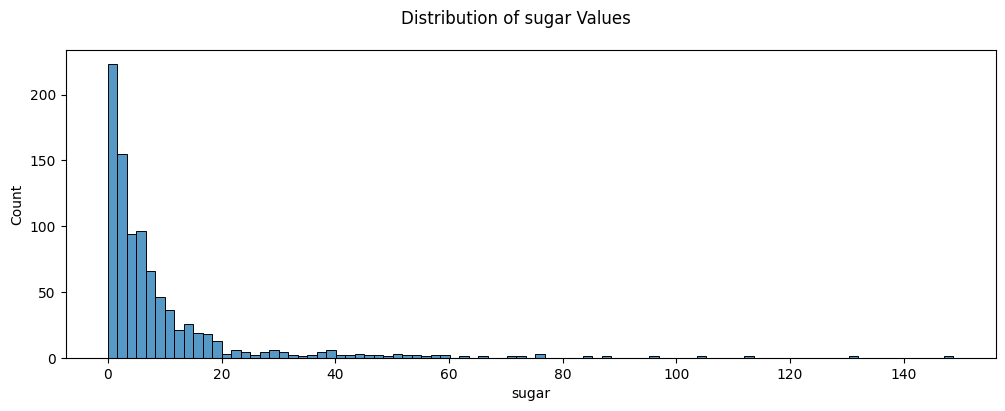

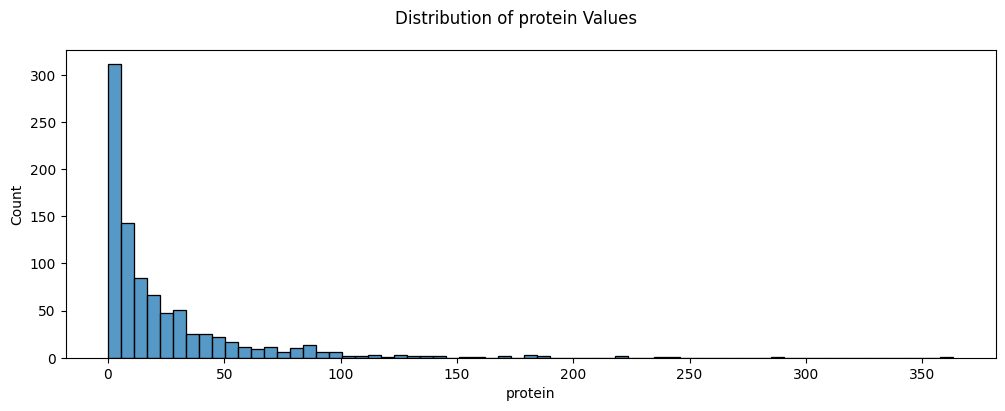

In [13]:
# Inspect the value distribution of Nutritional Info columns

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['calories',
                   'carbohydrate', 
                   'sugar', 
                   'protein'] 

for col in numeric_columns: 
    fig, ax = plt.subplots(figsize=(12, 4))
    fig.suptitle(f'Distribution of {col} Values')
    sns.histplot(ax=ax, x=col, data=df)
    plt.show()    


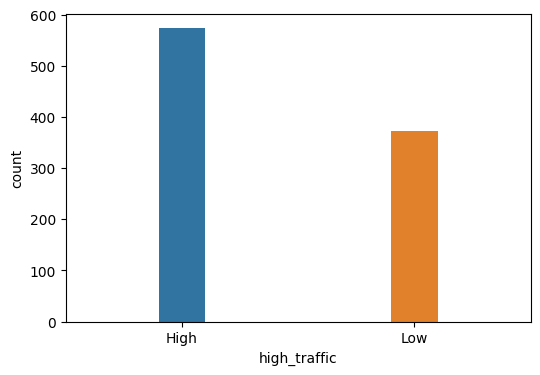

In [14]:
# Inspect the value distribution of the target column "high_traffic"

df['high_traffic'] = df['high_traffic'].fillna('Low')
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(ax=ax, x='high_traffic', data=df, hue_order=['High', 'Low'], width=0.2, hue='high_traffic')
plt.show()

In [15]:
print('Original Target Rate: %.2f%%' % (100.0 * len(df[df['high_traffic'] == 'High']) / len(df)))

Original Target Rate: 60.61%


## Clean Data

<p>Basic EDA shows that there are data problems in the dataframe:</p>
- There are missing values in the Nutritional Info columns "<b>calories</b>", "<b>carbohydrate</b>", "<b>sugar</b>" and "<b>protein</b>". </br>
- "<b>category</b>" column has 11 distince values, other than the 10 categories defined in the data info. </br>
- The data type of "<b>servings</b>" column is "object", while it should be numeric. </br> 

<p>Here, we are going to deal with these problems to clean the data. </p>

#### Clean the data in "category" column

In [16]:
df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [17]:
# "Chicken Breast" category is not defined in the data info. We merge it with the "Chicken" category. 
df_cleaned = df.copy()
df_cleaned['category'] = df_cleaned['category'].str.replace(' Breast', '')

In [18]:
df_cleaned['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

#### Clean the data in "servings" column

In [19]:
df_cleaned['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [20]:
# There are non-numeric values in "servings" column, which should be converted to numeric values.
df_cleaned['servings'] = df_cleaned['servings'].str.replace(' as a snack', '')
# df_cleaned['servings'] = df_cleaned['servings'].astype('int')

In [21]:
df_cleaned['servings'].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

#### Clean the data in Nutritional Info columns "calories", "carbohydrate", "sugar" and "protein" 

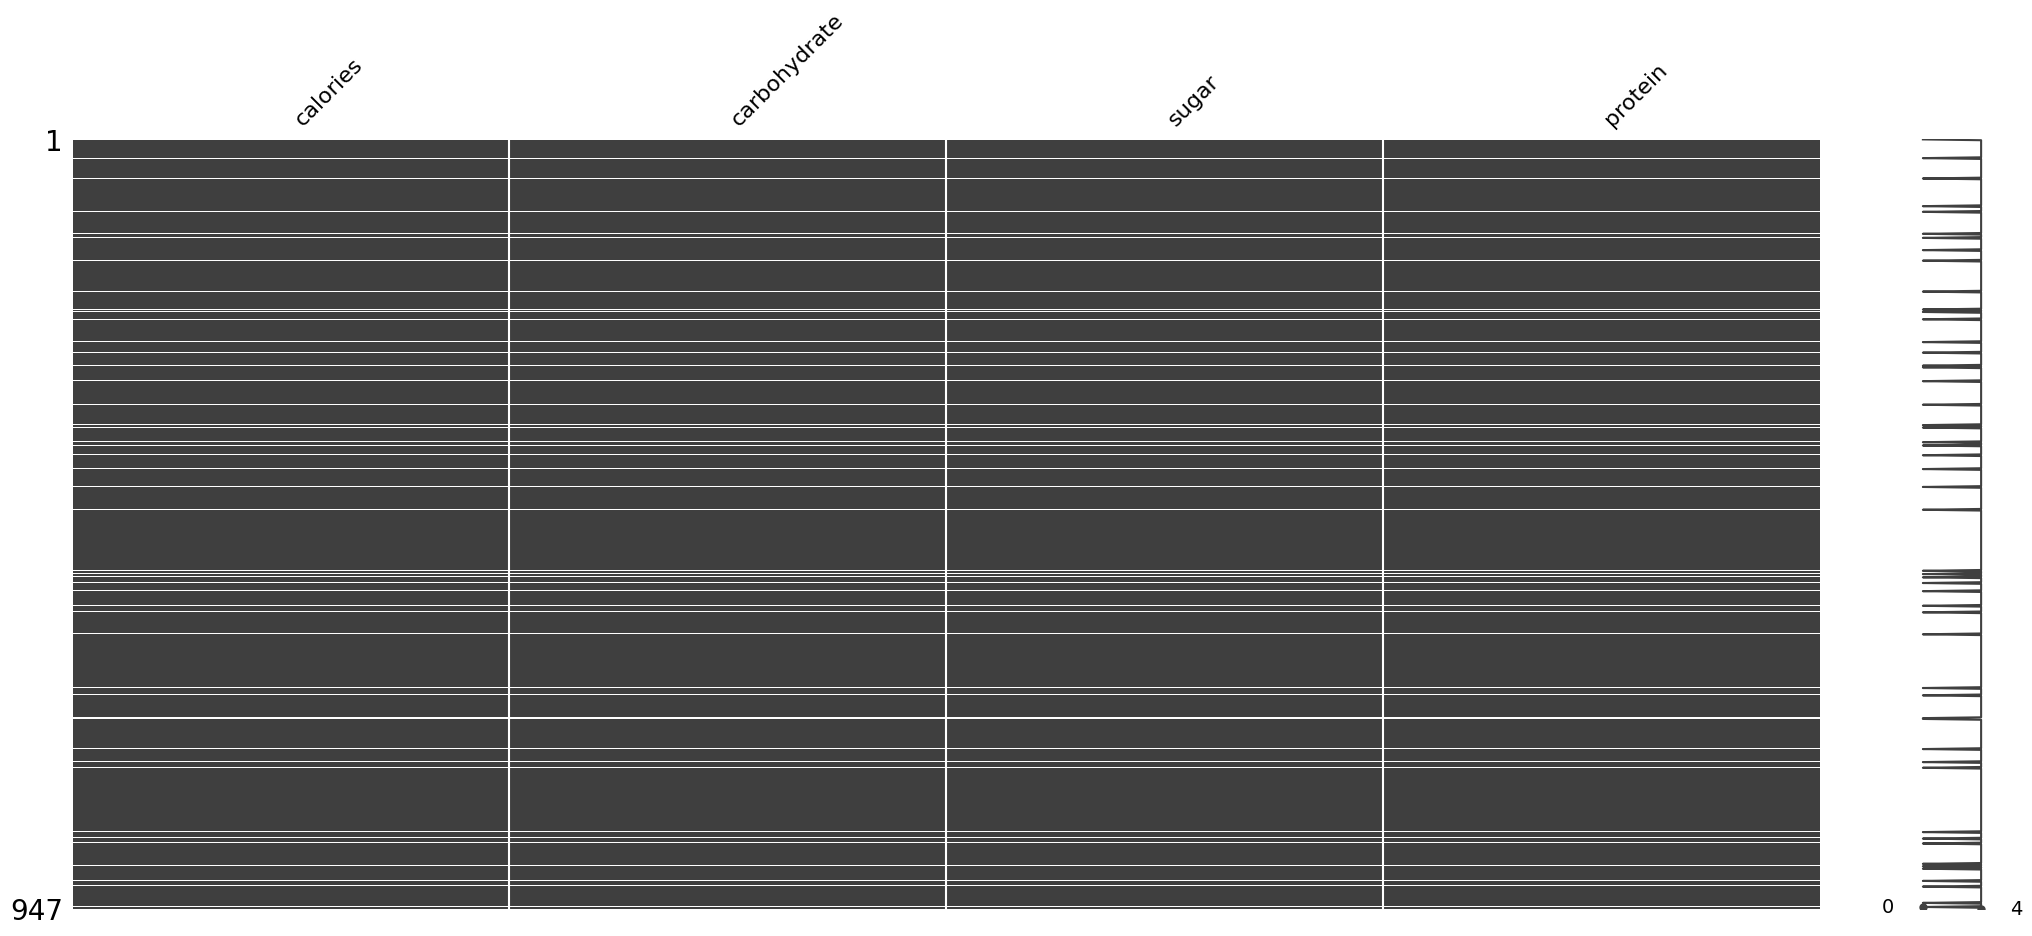

In [22]:
# Inspect the missing data 

import missingno as msno
df_missing = df_cleaned[numeric_columns]
msno.matrix(df_missing)
plt.show()

In [23]:
# The missing data visualization shows that the missing values in the 4 Nutritional Info columns always happen together.
# We then check if the rows with missing values in the Nutritional Info columns always have low traffic, 
# and if the missing values associate with any specific category. 

print(df_cleaned[df_cleaned['calories'].isna()].groupby(by='high_traffic')[['recipe', 'calories', 'carbohydrate', 'sugar', 'protein']].count())

              recipe  calories  carbohydrate  sugar  protein
high_traffic                                                
High              39         0             0      0        0
Low               13         0             0      0        0


In [24]:
print(df_cleaned[df_cleaned['calories'].isna()].groupby(by='category').count())

               recipe  calories  carbohydrate  sugar  protein  servings  \
category                                                                  
Chicken             9         0             0      0        0         9   
Dessert             6         0             0      0        0         6   
Lunch/Snacks        7         0             0      0        0         7   
Meat                5         0             0      0        0         5   
One Dish Meal       4         0             0      0        0         4   
Pork               11         0             0      0        0        11   
Potato              5         0             0      0        0         5   
Vegetable           5         0             0      0        0         5   

               high_traffic  
category                     
Chicken                   9  
Dessert                   6  
Lunch/Snacks              7  
Meat                      5  
One Dish Meal             4  
Pork                     11  
Potato   

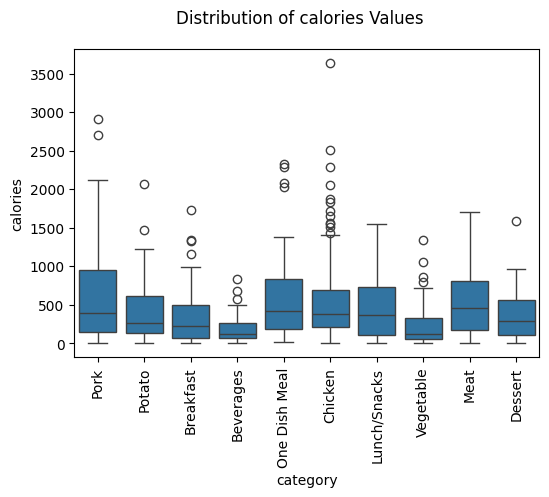

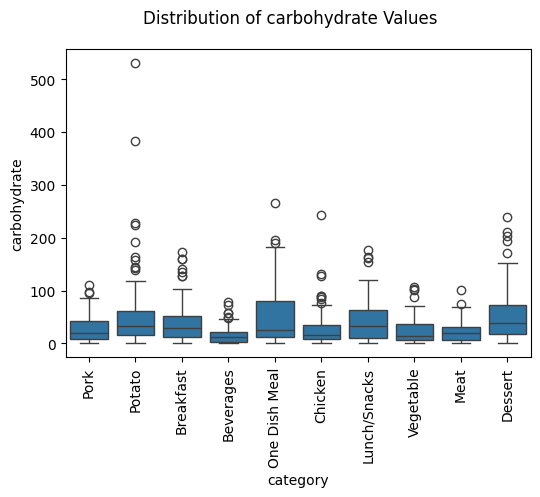

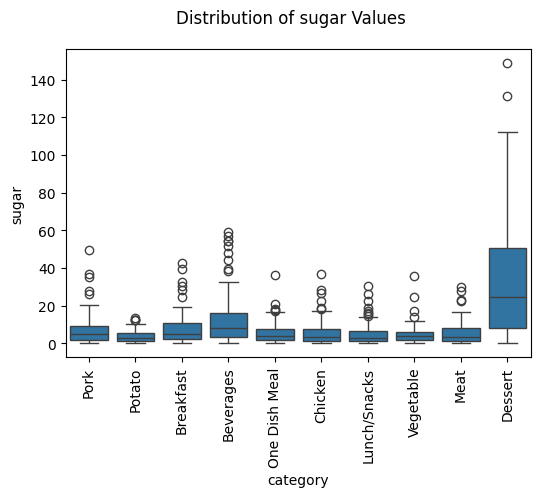

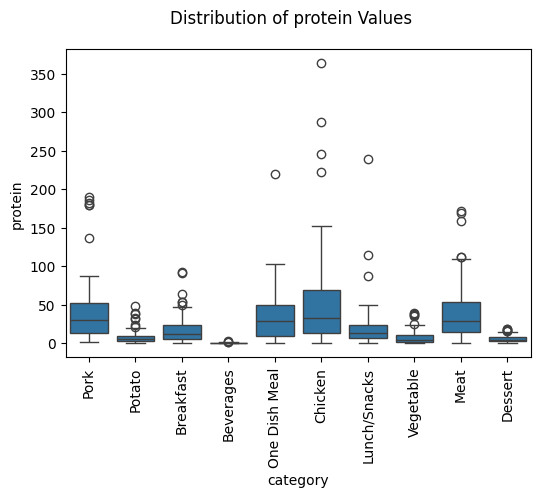

In [25]:
# The inspection results above show that the records with missing values are not associated with any specific category, 
# and 3/4 of the such records have high traffic, i.e. they are target records. 
# Therefore, we don't drop these records with missing values, instead we try to impute the missing values. 
# To figure out which imputation method is appropriate, we check the distribution of the 4 Nutritional Info columns for each category.

for col in numeric_columns: 
    fig, ax = plt.subplots(figsize=(6, 4))
    fig.suptitle(f'Distribution of {col} Values')
    sns.boxplot(ax=ax, x='category', y=col, data=df_cleaned)
    plt.xticks(rotation=90)
    plt.show()


In [26]:
# From the boxplots above, we can see that for each of the Nutritional Info columns, the medians 
# for different categories are different. Therefore, we use the medians for each category to impute the missing values. 

lst_categories = df_cleaned['category'].unique().tolist()

for category in lst_categories:
    median = df_cleaned[df_cleaned['category']==category].median(numeric_only=True)
    fill_values = {'calories': median['calories'],
                   'carbohydrate': median['carbohydrate'],
                   'sugar': median['sugar'],
                   'protein': median['protein']
                  }
    
    df_cleaned.loc[df_cleaned['category']==category] = df_cleaned[df_cleaned['category']==category].fillna(fill_values)


In [27]:
df_cleaned[['calories', 'carbohydrate', 'sugar', 'protein']].isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
dtype: int64

## Perform Feature Engineering

<p>From the basic EDA, we know that the "category" and "servings" columns are in "object" type. We are going to create one-hot numeric features for these two columns. </p>

<p>The "high_traffic" column are also in "object" type. It is the column of target. We are going to construct numeric target values based on this column. </p>

<p>The basic EDA shows the distribution of the 4 Nutritional Info columns are all right skewed. We are going to transform the data to deal with the skewness.</p>


#### Create one-hot numeric features for "category"

In [28]:
df_prepared = df_cleaned.copy()

dummies_category = pd.get_dummies(data=df_prepared['category'], drop_first=True)

df_prepared = pd.concat([df_prepared, dummies_category], axis=1)
df_prepared = df_prepared.drop('category', axis=1)

#### Create one-hot numeric features for "servings"

In [29]:
dummies_servings = pd.get_dummies(data=df_prepared['servings'], prefix='servings' , drop_first=True)

df_prepared = pd.concat([df_prepared, dummies_servings], axis=1)
df_prepared = df_prepared.drop('servings', axis=1)

In [30]:
df_prepared.head(10)

,recipe,calories,carbohydrate,sugar,protein,high_traffic,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable,servings_2,servings_4,servings_6
0,1,399.26,19.56,5.23,29.82,High,False,False,False,False,False,False,True,False,False,False,False,True
1,2,35.48,38.56,0.66,0.92,High,False,False,False,False,False,False,False,True,False,False,True,False
2,3,914.28,42.68,3.09,2.88,Low,True,False,False,False,False,False,False,False,False,False,False,False
3,4,97.03,30.56,38.63,0.02,High,False,False,False,False,False,False,False,False,False,False,True,False
4,5,27.05,1.85,0.80,0.53,Low,False,False,False,False,False,False,False,False,False,False,True,False
5,6,691.15,3.46,1.65,53.93,High,False,False,False,False,False,True,False,False,False,True,False,False
6,7,183.94,47.95,9.75,46.71,Low,False,True,False,False,False,False,False,False,False,False,True,False
7,8,299.14,3.17,0.40,32.40,Low,False,False,False,True,False,False,False,False,False,False,True,False
8,9,538.52,3.78,3.37,3.79,High,False,False,False,False,False,False,True,False,False,False,False,True
9,10,248.28,48.54,3.99,113.85,Low,False,True,False,False,False,False,False,False,False,True,False,False


#### Construct numeric target values based on "high_traffic" column

In [31]:
import numpy as np

df_prepared['is_high_traffic'] = np.where(df_prepared['high_traffic'] == 'High', 1, 0)
df_prepared = df_prepared.drop(['high_traffic'], axis=1)

In [32]:
df_prepared.head(10)

,recipe,calories,carbohydrate,sugar,protein,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable,servings_2,servings_4,servings_6,is_high_traffic
0,1,399.26,19.56,5.23,29.82,False,False,False,False,False,False,True,False,False,False,False,True,1
1,2,35.48,38.56,0.66,0.92,False,False,False,False,False,False,False,True,False,False,True,False,1
2,3,914.28,42.68,3.09,2.88,True,False,False,False,False,False,False,False,False,False,False,False,0
3,4,97.03,30.56,38.63,0.02,False,False,False,False,False,False,False,False,False,False,True,False,1
4,5,27.05,1.85,0.80,0.53,False,False,False,False,False,False,False,False,False,False,True,False,0
5,6,691.15,3.46,1.65,53.93,False,False,False,False,False,True,False,False,False,True,False,False,1
6,7,183.94,47.95,9.75,46.71,False,True,False,False,False,False,False,False,False,False,True,False,0
7,8,299.14,3.17,0.40,32.40,False,False,False,True,False,False,False,False,False,False,True,False,0
8,9,538.52,3.78,3.37,3.79,False,False,False,False,False,False,True,False,False,False,False,True,1
9,10,248.28,48.54,3.99,113.85,False,True,False,False,False,False,False,False,False,True,False,False,0


#### Handle the skewness in the distribution of the 4 Nutritional Info columns

In [33]:
# We use log transformation to deal with the skewness

import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

# As we would like to comapre the effects of with and without transformation in modeling, 
# a specific dataframe is created to contain the transformed features.
df_prepared_transformed = df_prepared.copy()

# Apply the transformation to the skewed features
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
arr_transformed = logarithm_transformer.transform(df_prepared_transformed[numeric_columns].values)

for idx in range(len(numeric_columns)):
    df_prepared_transformed[numeric_columns[idx]] = arr_transformed[:, idx]


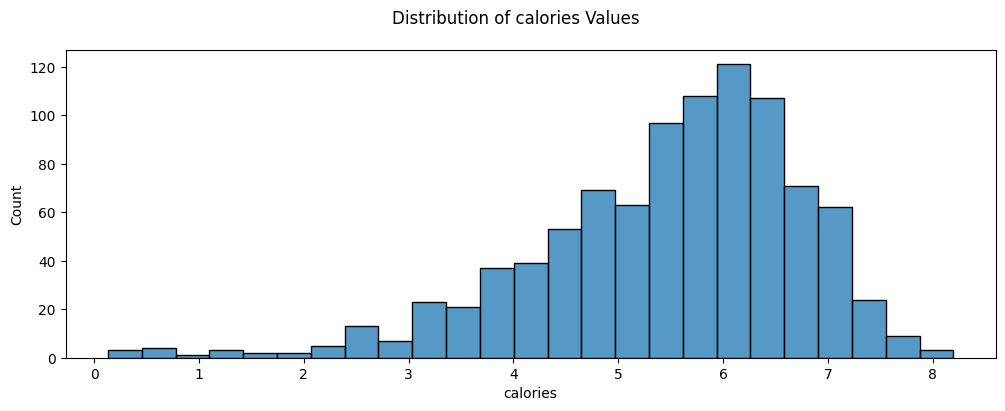

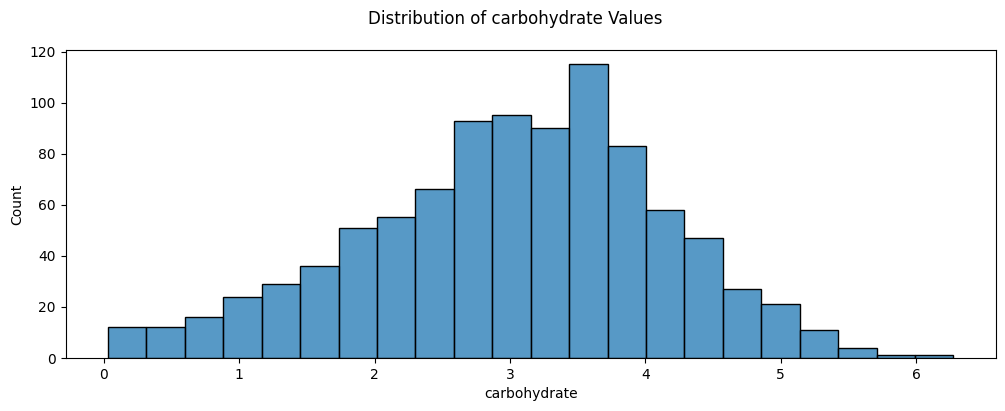

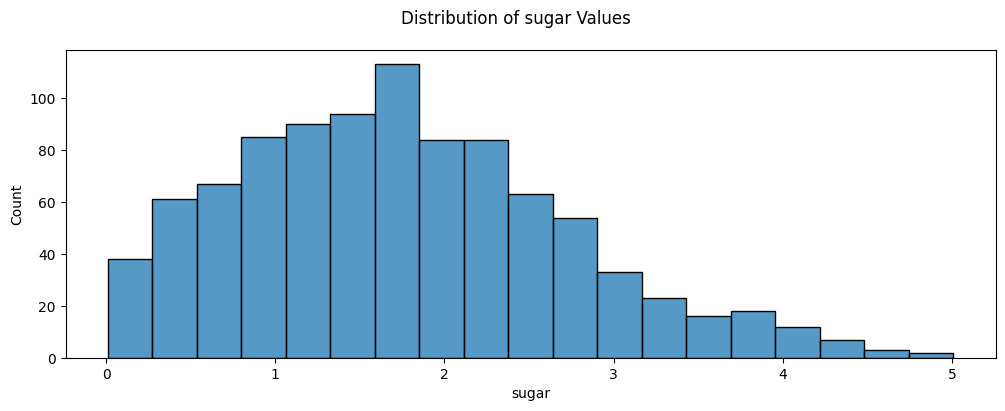

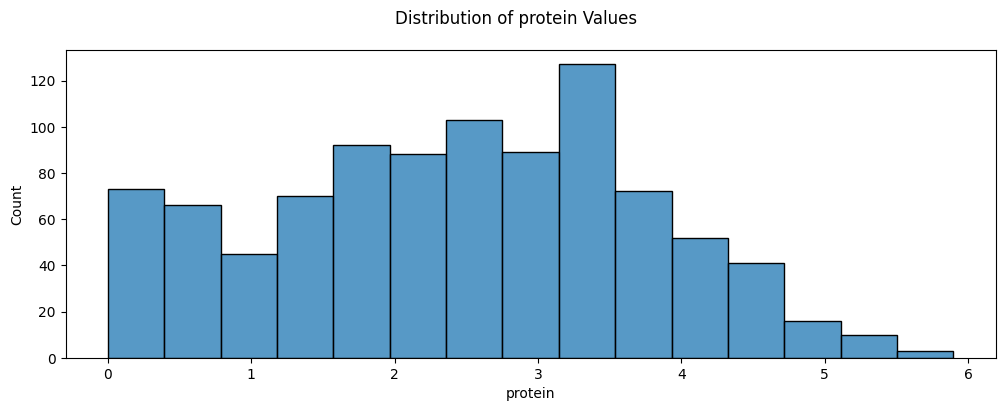

In [34]:
for col in numeric_columns: 
    fig, ax = plt.subplots(figsize=(12, 4))
    fig.suptitle(f'Distribution of {col} Values')
    sns.histplot(ax=ax, x=col, data=df_prepared_transformed)
    plt.show()  

## Build Classification Model By Using the Data without Transformation

In [35]:
# Different modeling algorithms are used to build classification models on the cleaned dataset with and without 
# transforming the Nutritional Info columns. The model quality are evaluated and compared to see if we can reach the goal
# to predict which recipes will be popular 80% of the time, as well as to see which modeling mechanism performs best. 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

#### Build Model by Using K-Nearest Neighbors

In [36]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)   

# Create two objects to store the precisions for different modeling mechanism
df_cv_precision = None
median_precision = []

# Grid search the best hyperparameters for the model mechanism
def tune_hyper_params(df, model, param_grid, kf) -> None:
    X = df.drop(['recipe', 'is_high_traffic'], axis=1).values
    y = df['is_high_traffic'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model_cv = GridSearchCV(model, param_grid, cv=kf)
    model_cv.fit(X, y)
    print(model_cv.best_params_)    

# Build up the model by using the best hyperparameters and evaluate the model quality
def build_evaluate_model(df, model_name, model, kf):
    global df_cv_precision
    global median_precision
    
    X = df.drop(['recipe', 'is_high_traffic'], axis=1).values
    y = df['is_high_traffic'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    results = []
    # cv_accuracy = cross_val_score(model, X_scaled, y, scoring="accuracy", cv=kf)
    # results.append(cv_accuracy)
    cv_precision = cross_val_score(model, X_scaled, y, scoring="precision", cv=kf)
    # results.append(cv_precision)

    # plt.boxplot(results, labels=["accuracy", "precision"])
    # plt.show()    
    
    # print(f'95% confidence interval of {model_name} Accuracy: [{np.quantile(cv_accuracy, 0.025)}, {np.quantile(cv_accuracy, 0.975)}]')
    print(f'95% confidence interval of {model_name} Precision: [{np.quantile(cv_precision, 0.025)}, {np.quantile(cv_precision, 0.975)}]')
    # print(f'Median of {model_name} Accuracy: {np.quantile(cv_accuracy, 0.50)}')
    print(f'Median of {model_name} Precision: {np.quantile(cv_precision, 0.50)}')
    df_results = pd.DataFrame({'precison': cv_precision,
                               'model_name': [model_name for i in range(10)]})
    
    if df_cv_precision is None:
        df_cv_precision = df_results
    else: 
        df_cv_precision = pd.concat([df_cv_precision, df_results], ignore_index=True)
        
    median_precision.append(np.quantile(cv_precision, 0.50))
        


In [37]:
param_grid = {'n_neighbors': np.arange(10, 100, 5),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

tune_hyper_params(df_prepared, KNeighborsClassifier(), param_grid, kf)

{'algorithm': 'auto', 'n_neighbors': 85}


In [38]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=85)
build_evaluate_model(df_prepared, 'KNN', knn, kf)

95% confidence interval of KNN Precision: [0.7131669805398619, 0.8689130434782608]
Median of KNN Precision: 0.8205539943797672


#### Build Model by Using DecisionTreeClassifier

In [39]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss']}

tune_hyper_params(df_prepared, DecisionTreeClassifier(random_state=42), param_grid, kf)

{'criterion': 'gini'}


In [40]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
build_evaluate_model(df_prepared, 'DecisionTree', dt, kf)

95% confidence interval of DecisionTree Precision: [0.6625, 0.8235507246376812]
Median of DecisionTree Precision: 0.7136314655172413


#### Build Model by Using LogisticRegression

In [41]:
param_grid = {'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] 
             }

tune_hyper_params(df_prepared, LogisticRegression(random_state=42), param_grid, kf)

d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: Con

{'penalty': 'l1', 'solver': 'liblinear'}


d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: Con

In [42]:
lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
build_evaluate_model(df_prepared, 'LogisticRegression', lr, kf)

95% confidence interval of LogisticRegression Precision: [0.7074236874236874, 0.8698200559049616]
Median of LogisticRegression Precision: 0.797979797979798


#### Build Model by Using SVM Classifier

In [43]:
param_grid = {# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']
             }

tune_hyper_params(df_prepared, SVC(random_state=42), param_grid, kf)

{'gamma': 'scale'}


In [44]:
svc = SVC(kernel='rbf', gamma='scale', random_state=42)
build_evaluate_model(df_prepared, 'SVM', svc, kf)

95% confidence interval of SVM Precision: [0.7108637142158062, 0.868030303030303]
Median of SVM Precision: 0.787037037037037


#### Build Model by Using ExtraTrees

In [45]:
param_grid = {'n_estimators': np.arange(100, 210, 20),
              'criterion': ['gini', 'entropy', 'log_loss'],
             }

tune_hyper_params(df_prepared, ExtraTreesClassifier(random_state=42), param_grid, kf)

{'criterion': 'entropy', 'n_estimators': 100}


In [46]:
extra_trees = ExtraTreesClassifier(criterion='entropy', n_estimators=100, random_state=42)
build_evaluate_model(df_prepared, 'ExtraTrees', extra_trees, kf)

95% confidence interval of ExtraTrees Precision: [0.7055422446406053, 0.832625786163522]
Median of ExtraTrees Precision: 0.7833333333333333


#### Build Ensemble Model by Using Multiple Modeling Mechanisms

In [47]:
classifiers = [('KNNClassifier', knn),
               ('DecisionTreeClassifier', dt),
               ('LogisticRegressionClassifier', lr),
               ('SVMClassifier', svc),
               ('ExtraTreesClassifier', extra_trees)
              ]

vc = VotingClassifier(estimators=classifiers)

build_evaluate_model(df_prepared, 'EnsembleModel', vc, kf)

95% confidence interval of EnsembleModel Precision: [0.7171354166666667, 0.8653846153846154]
Median of EnsembleModel Precision: 0.7958833619210979


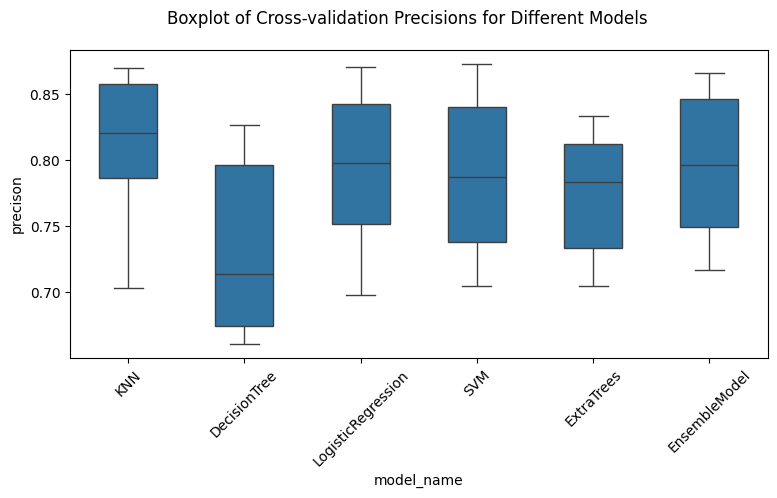

In [48]:
fig, ax = plt.subplots(figsize=(9, 4))
fig.suptitle(f'Boxplot of Cross-validation Precisions for Different Models')
sns.boxplot(ax=ax, y='precison', x='model_name', data=df_cv_precision, width=0.5)
plt.xticks(rotation=45)
plt.show()

In [49]:
print(f'The median CV precison for different models is in the range: [%.2f, %.2f]' % (min(median_precision), max(median_precision)))

The median CV precison for different models is in the range: [0.71, 0.82]


## Build Classification Model By Using the Data with Transformation

#### Build Model by Using k-Nearest Neighbors

In [50]:
df_cv_precision = None
median_precision = []

param_grid = {'n_neighbors': np.arange(10, 100, 5),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

tune_hyper_params(df_prepared_transformed, KNeighborsClassifier(), param_grid, kf)

{'algorithm': 'auto', 'n_neighbors': 20}


In [51]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=20)
build_evaluate_model(df_prepared_transformed, 'KNN', knn, kf)

95% confidence interval of KNN Precision: [0.6891676234213548, 0.8621999414519906]
Median of KNN Precision: 0.783273131425396


#### Build Model by Using DecisionTreeClassifier

In [52]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss']}

tune_hyper_params(df_prepared_transformed, DecisionTreeClassifier(random_state=42), param_grid, kf)

{'criterion': 'gini'}


In [53]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
build_evaluate_model(df_prepared_transformed, 'DecisionTree', dt, kf)

95% confidence interval of DecisionTree Precision: [0.6636194029850746, 0.8292657916324857]
Median of DecisionTree Precision: 0.7120689655172414


#### Build Model by Using LogisticRegression

In [54]:
param_grid = {'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] 
             }

tune_hyper_params(df_prepared_transformed, LogisticRegression(random_state=42), param_grid, kf)

d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: Con

{'penalty': 'l1', 'solver': 'liblinear'}


d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\envs\data_ai_lab\Lib\site-packages\sklearn\linear_model\_sag.py:349: Con

In [55]:
lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
build_evaluate_model(df_prepared_transformed, 'LogisticRegression', lr, kf)

95% confidence interval of LogisticRegression Precision: [0.7100198412698412, 0.868030303030303]
Median of LogisticRegression Precision: 0.8013392857142857


#### Build Model by Using SVM Classifier

In [56]:
param_grid = {# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']
             }

tune_hyper_params(df_prepared_transformed, SVC(random_state=42), param_grid, kf)

{'gamma': 'auto'}


In [57]:
svc = SVC(kernel='rbf', gamma='auto', random_state=42)
build_evaluate_model(df_prepared_transformed, 'SVM', svc, kf)

95% confidence interval of SVM Precision: [0.7084438283510125, 0.8560889929742388]
Median of SVM Precision: 0.7825166364186328


#### Build Model by Using ExtraTrees

In [58]:
param_grid = {'n_estimators': np.arange(100, 210, 20),
              'criterion': ['gini', 'entropy', 'log_loss'],
             }

tune_hyper_params(df_prepared_transformed, ExtraTreesClassifier(random_state=42), param_grid, kf)

{'criterion': 'entropy', 'n_estimators': 160}


In [59]:
extra_trees = ExtraTreesClassifier(criterion='entropy', n_estimators=160, random_state=42)
build_evaluate_model(df_prepared_transformed, 'ExtraTrees', extra_trees, kf)

95% confidence interval of ExtraTrees Precision: [0.70421875, 0.8417641325536063]
Median of ExtraTrees Precision: 0.7768740031897927


#### Build Ensemble Model by Using Multiple Modeling Mechanisms

In [60]:
classifiers = [('KNN Classifier', knn),
               ('DecisionTreeClassifier', dt),
               ('LogisticRegressionClassifier', lr),
               ('SVM Classifier', svc),
               ('ExtraTrees Classifier', extra_trees)
              ]

vc = VotingClassifier(estimators=classifiers)

build_evaluate_model(df_prepared_transformed, 'EnsembleModel', vc, kf)

95% confidence interval of EnsembleModel Precision: [0.6852553638059702, 0.8645238095238096]
Median of EnsembleModel Precision: 0.7965517241379311


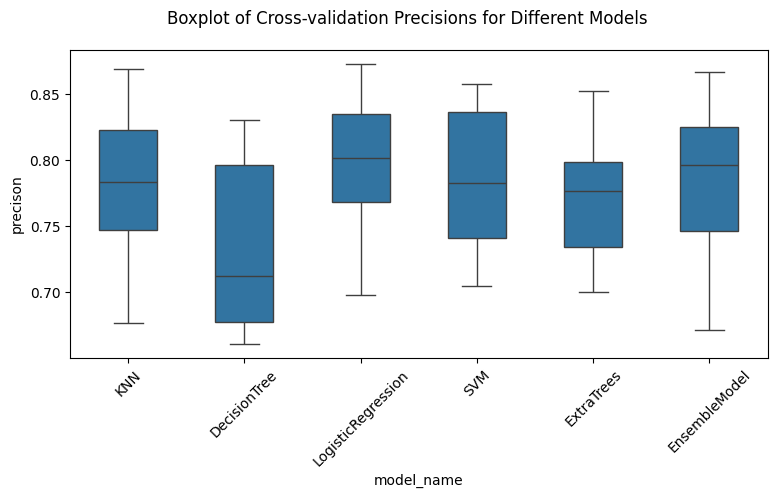

In [61]:
fig, ax = plt.subplots(figsize=(9, 4))
fig.suptitle(f'Boxplot of Cross-validation Precisions for Different Models')
sns.boxplot(ax=ax, y='precison', x='model_name', data=df_cv_precision, width=0.5)
plt.xticks(rotation=45)
plt.show()

In [62]:
print(f'The median CV precison for different models is in the range: [%.2f, %.2f]' % (min(median_precision), max(median_precision)))

The median CV precison for different models is in the range: [0.71, 0.80]


## Summary and Conclusions 

<p>In the project, the data has been cleaned and processed in the following way:</p>
1.  Different values of same category in "category" column have been merged, to make sure that "category" column contains 10 distince values.</br>
2. Different values of same serving number have been merged in "servings" column.</br>
3. The missing values in "calories", "carbohydrate", "sugar" and "protein" columns are imputed by using their category-wise medians, respectively.</br>
4. One-hot dummy features are created for both "category" and "servings" columns.</br>
5. Log transformation has been performed to handle the skewness in the distribution of "calories", "carbohydrate", "sugar" and "protein" columns.</br>

<p>Different modeling mechanisms, such as KNeighborsClassifier, DecisionTreeClassifier and LogisticRegression, as well as ensembing method, have been used to build up the classifiers to predict which recipes will be popular. 10-fold cross validation has been performed to evaluate the model precision. Comparisons show that by using log-transformed numeric features there is no model quality iomprovement. By using <b>K-Nearest Neighbors</b> modeling mechanism and without using the log-transformated numeric features, we can build up a classification model with the best cross-validation results of precision:</p>  
 
- the median of cross validation precisions is greater than 0.82. </br>
- the 95% confidence interval of classification precision is [0.71, 0.87]. </br>    
    
<p>Therefore, we can conclude that <b><I>it is promising for us to build models to correctly predict which recipes will be popular at about 80% of the time</I></b>. We recommend the Product team to deploy such a classification model to make the prediction. </p> 


## Report of Predicting Recipe Site Traffic


### Introduction
<p>Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so Tasty Bytes decided to provide it. The company started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home.</p>

<p>At the moment, the Product team choose their favorite recipe from a selection and display that on the home page. They have noticed that traffic to the rest of the website goes up by as much as 40% if a popular recipe is picked. More traffic means more subscriptions so this is really important to the company. But they don’t know how to decide if a recipe will be popular. They seek the Data Science team's help to choose which recipes should be displayed on the home page. They whould like to know if it is possible to:</p>
    1. predict which recipes will lead to high traffic; <br>
    2. correctly predict high traffic recipes 80% of the time. <br>
<br>
<p>A dataset has been provided to make the investigation.</p>

<p> Since the objective of this project is to "<I>predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes</I>", we will build up classification models to perform the prediction, and will use <b>precision</b> as the metric to evaluate if the classifiers can correctly predict high traffic recipes 80% of the time. Different classification modeling mechanisms will be used to build up the classifiers to see if the objective can be reached, and ensemble models will be built up as well. </p>   

### Data Validation

<p>The dataset is provided as a CSV file "recipe_site_traffic_2212.csv". It has 947 records, with 8 columns as described below:</p>

![image](image_01.png)

<p>Basic EDA shows that there are data problems in the dataframe:</p>
- There are missing values in the Nutritional Info columns "<b>calories</b>", "<b>carbohydrate</b>", "<b>sugar</b>" and "<b>protein</b>". </br>
- "<b>category</b>" column has 11 distince values, while 10 categories are defined in the data info. </br>
- The data type of "<b>servings</b>" column is "object", while it should be numeric. </br>  
- There are missing values in "<b>high_traffic</b>" column. </br> 
</br>
<p>Data cleaning steps are performed as follows:</p>
- Data analysis shows that "<b>category</b>" column contains an undefined value "Chicken Breast". This value is merged with the category value "Chicken".</br>
- Two non-numeric values, "4 as a snack" and "6 as a snack", are found in "<b>servings</b>" column. These two values are converted to numeric values by removing   " as a snack" in the strings.</br>
- Further data analysis shows that the missing values in the 4 Nutritional Info columns always happen together. The rows with missing values in the Nutritional Info columns can have either high or low traffic, and the missing values do not associate with any specific category. Therefore, we don't drop these records with missing values; instead for each Nutritional Info column, the category-wise medians are used to impute the missing values for each category. </br>
- The missing values in the target column "<b>high_traffic</b>" are imputed as "Low" traffic based on the Data Info.</br>  

### Exploratory Analysis Results

1. Histograms are created to show that the value distribution of Nutritional Info columns are all right skewed. For example, the distribution of "calories" is shown below:

![image](images/image_02.png)
    
<p>After performing log-transformation, the distribution of of these columns are close to normal distribution. For "calories" column, the distribution of log-transformed values of "calories" is shown below:</p>
    
![image](images/image_06.png)    

2. A barchat is created to show the value distribution of the target column "high_traffic". In the dataset, the distribution of "High" and "Low" traffic values is not very unbalanced, therefore sample balancing is not necessary in modeling:

![image](images/image_03.png)

3. A missingno plot is created to show the distribution of missing values in the Nutritional Info columns "calories", "carbohydrate", "sugar" and "protein". It can be seen that the missing values in these 4 columns always happen together.
    
![image](images/image_04.png)
    
4. Boxplots are created to investigate the distribution of the values of 4 Nutritional Info columns for each category. From the boxplots, we can see that for each of the Nutritional Info columns, the medians for different categories are different. Therefore, we use the medians for each category to impute the missing values. One of these boxplots -- the boxplot for "calories" column -- is shown below:    

![image](images/image_05.png)

### Model Development
<p>It is a typical <b>classification</b> problem to predict which recipes will lead to high traffic. So, classification models are built up to solve the problem. <b>K-Nearest Neighbors</b> algorithm is used to build the baseline model. Other mechanisms, including <b>DecisionTree</b>, <b>LogisticRegression</b>, <b>SVM</b>, and <b>ExtraTrees</b>, are used to build the models for comparison. For each modeling mechanism, grid search is used to find the best hyperparameters. An <b>Ensemble model</b> is also built up based on all these modeling algorithms, by using majority voting. </p>

<p>To build the classification models, one-hot dummy features are created for "category" and "servings" columns. The original and  log-transformed Nutritional Info features are used respectively to build up the models, to investigate if skewness handling by using log transformation can improve the model quality. </p>

### Metric for the Business to Monitor

<p> Since the objective of this project is to "<I>predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes</I>", we use <b>precision</b> as the metric to evaluate if the classifiers can correctly predict high traffic recipes 80% of the time. In this Recipe Site Traffic project, precision represents the proportion of high traffic recipes among all the recipes displayed on the home page, as well as the proportion of true high traffic recipes among all the recipes selected by the classification model. </p>  

<p>Based on the current data, the target rate is 60.61%; i.e., the original precision based on the data is 60.61%.</p>

### Model Evaluation

<p>For each modeling mechanism, 10-fold cross validation has been performed to evaluate the model precision. Comparisons show that using log-transformed numeric features does not introduce model quality iomprovement.</p>

<p>By using the numeric features without log-transformation, the distribution of 10-fold cross validation precisions for different modeling mechanisms can be shown by the following boxplot:</p>

![image](images/image_07.png)

<p>It can be seen that the <b>K-Nearest Neighbors</b> model has the best distribution of cross validation precisions; the mean precision value for this model is greater than 0.82, the 95% confidence interval of precision is [0.71, 0.87]. </p>

 
### Summary and Conclusions     
    
<p>Different modeling mechanisms, such as KNeighborsClassifier, DecisionTreeClassifier and LogisticRegression, as well as ensembing method, have been used to build up the classifiers to predict which recipes will be popular. 10-fold cross validation has been performed to evaluate the model precision. Comparisons show that by using log-transformed numeric features there is no model quality iomprovement. By using <b>K-Nearest Neighbors</b> modeling mechanism and without using the log-transformated numeric features, we can build up a classification model with the best cross-validation results of precision:</p>  
 
- the median of cross validation precisions is greater than 0.82. </br>
- the 95% confidence interval of classification precision is [0.71, 0.87]. </br>    
    
<p>Therefore, we can conclude that <b><I>it is promising for us to build models to correctly predict which recipes will be popular at about 80% of the time</I></b>. We recommend the Product team to deploy such a classification model to make the prediction. </p>   